In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


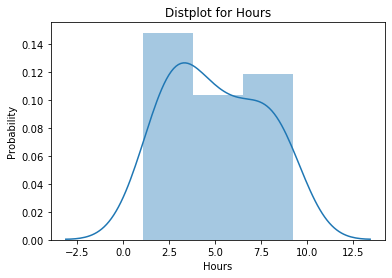

In [6]:
sns.distplot(df['Hours'])
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.title('Distplot for Hours')
plt.show()

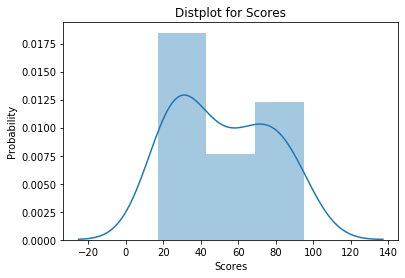

In [7]:
sns.distplot(df['Scores'])
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Distplot for Scores')
plt.show()

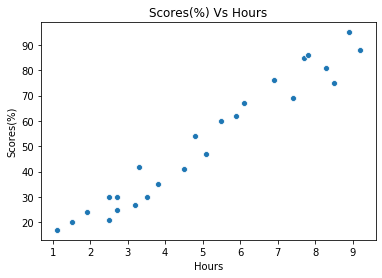

In [8]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.title('Scores(%) Vs Hours')
plt.show()

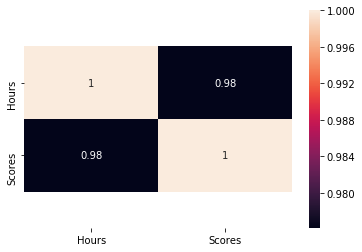

In [9]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [10]:
X=df[['Hours']]
y=df[['Scores']]

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
Xtrain.shape , Xtest.shape

((20, 1), (5, 1))

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression(fit_intercept=True)

In [16]:
lr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lr.intercept_

array([2.01816004])

In [18]:
lr.coef_

array([[9.91065648]])

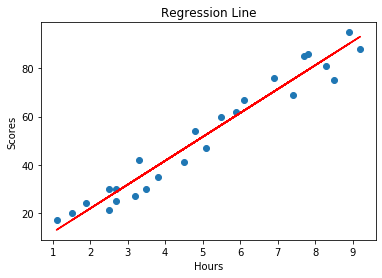

In [19]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

In [20]:
y_pred=lr.predict(Xtest)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [21]:
y_pred=y_pred.flatten()

In [22]:
data=pd.DataFrame({'Actual':ytest.values.flatten(),'Prediction':y_pred})


In [23]:
print(data)

   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


In [24]:
lr.score(Xtest,ytest)

0.9454906892105354

In [25]:
hours=np.array(9.25).reshape(1,-1)
result=lr.predict(hours)
print('No. of hours:',np.asscalar(hours))
print('Predicted Score (%):',np.asscalar(result))

No. of hours: 9.25
Predicted Score (%): 93.69173248737539


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [28]:
RMSE=mean_squared_error(ytest,y_pred)

In [32]:
squared=False

In [36]:
print('The value is: ',RMSE)

The value is:  21.598769307217456


In [34]:
import math

In [37]:
u=math.sqrt(RMSE)
print('The RMSE is:',u)

The RMSE is: 4.647447612100373


In [38]:
MSE=mean_squared_error(ytest,y_pred)

In [39]:
print('The MSE is:',MSE)

The MSE is: 21.598769307217456


In [40]:
MAE=mean_absolute_error(ytest, y_pred)

In [41]:
print('The MAE is:',MAE)

The MAE is: 4.183859899002982
